In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Upload kaggle.json Download it from
Kaggle-> account -> Create new API token -> kaggle.json

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hassambaig","key":"9b9c215b2b695ce96d0a46bfd0d4dd96"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Dataset
Be sure to accept rules in rules tab of this specific competetion

In [4]:
# Kaggle api to import the data
!kaggle competitions download -c cifar-10

 97% 694M/715M [00:03<00:00, 200MB/s]
100% 715M/715M [00:03<00:00, 218MB/s]


In [5]:
#Extracting the dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The Dataset is extracted')

The Dataset is extracted


In [6]:
#Extracting
!7z x train.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs AMD EPYC 7B12 (830F10),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 109723070 bytes (105 MiB)

Extracting archive: train.7z
--
Path = train.7z
Type = 7z
Physical Size = 109723070
Headers Size = 294768
Method = LZMA:26
Solid = +
Blocks = 1

  0%      2%      2% 617 - train/10553.png                            2% 1100 - train/10989.png                             2% 1381 - train/11240.png                             2% 1608 - train/11445.png                             2% 1857 - train/1167.png                            6% 

Importing the Dependencies

In [7]:
import numpy as np
from PIL import Image #pillow library
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Display Images of Dogs and cats

<function matplotlib.pyplot.show(close=None, block=None)>

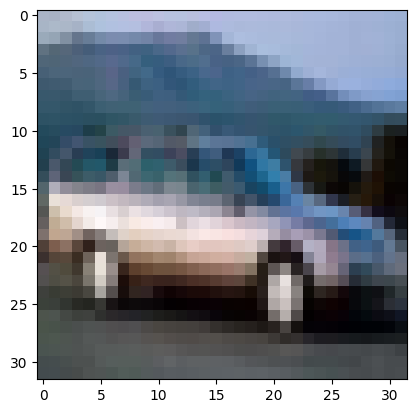

In [8]:
#Display an image
img = mpimg.imread('/content/train/5.png')
imgplt = plt.imshow(img)
plt.show

Mobile_Net_V2 inputs images of 224x224 pixels
Thus we need to resize all the input images so that model can read the data properly

Resizing first 4000 images from data due to system limitation

As we are using transfer learning model so we will use small dataset thus we will reduce number of images

In [9]:
!mkdir upsampled_images

In [10]:
import os
import csv
from PIL import Image

# Folder path containing the original images
folder_path = "/content/train"

# Desired resolution for resizing
target_resolution = (224, 224)

# CSV file path containing image names and target names
csv_file_path = "/content/trainLabels.csv"

# Output folder for resized images
output_folder = "/content/upsampled_images"

# Create the output folder
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Open the CSV file
with open(csv_file_path, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)  # Skip the header row if it exists

    #for row in csv_reader:
    for row in csv_reader:
      image_name = row[0]  # Extract the image name from the first column
      if image_name == "4001":
        print('breaking')
        break

      target_name = row[1]  # Extract the target name from the second column

        # Construct the full path of the image file
      image_path = os.path.join(folder_path, image_name + ".png")

      original_image = Image.open(image_path)

        # Resize the image to the desired resolution
      resized_image = original_image.resize(target_resolution, Image.BILINEAR)

        # Constructing the new file name with the target name and image name
      new_file_name = f"{target_name}.{image_name}"

        # Construct the full path of the resized image file in the output folder
    #  resized_image_path = os.path.join(output_folder, new_file_name)

        # Saving the resized image

      resized_image_path = os.path.join(output_folder, new_file_name + ".jpg")
      resized_image.save(resized_image_path)

breaking


In [11]:
#counting Number of files in train folder
import os
path, dirs, files = next(os.walk('/content/upsampled_images'))
file_count = len(files)
print('Number of images: ',file_count)

Number of images:  4000


In [12]:
file_names = os.listdir('/content/upsampled_images')
print(file_names)

['automobile.2006.jpg', 'bird.3630.jpg', 'bird.145.jpg', 'deer.1222.jpg', 'deer.2952.jpg', 'airplane.2479.jpg', 'frog.3440.jpg', 'truck.72.jpg', 'frog.2311.jpg', 'airplane.1261.jpg', 'truck.203.jpg', 'deer.1664.jpg', 'automobile.1600.jpg', 'deer.3685.jpg', 'cat.619.jpg', 'ship.2213.jpg', 'airplane.3442.jpg', 'automobile.1302.jpg', 'deer.2655.jpg', 'bird.3396.jpg', 'bird.1706.jpg', 'frog.1102.jpg', 'horse.13.jpg', 'bird.1831.jpg', 'airplane.1124.jpg', 'cat.2052.jpg', 'bird.1746.jpg', 'deer.3926.jpg', 'ship.1256.jpg', 'automobile.1870.jpg', 'truck.578.jpg', 'horse.2398.jpg', 'dog.1692.jpg', 'ship.3131.jpg', 'frog.3604.jpg', 'truck.1673.jpg', 'truck.2759.jpg', 'cat.1917.jpg', 'frog.3071.jpg', 'ship.2111.jpg', 'airplane.2402.jpg', 'airplane.732.jpg', 'dog.3174.jpg', 'frog.3201.jpg', 'automobile.3258.jpg', 'airplane.1131.jpg', 'deer.1285.jpg', 'deer.3466.jpg', 'airplane.2392.jpg', 'truck.2193.jpg', 'deer.2298.jpg', 'truck.3653.jpg', 'dog.876.jpg', 'deer.3953.jpg', 'dog.3081.jpg', 'deer.952.

Extracting and assigning labels

In [13]:
#Creating for loop to assign lables
filenames = os.listdir('/content/upsampled_images')

labels = [] #list called as lables

for i in range(min(4001, len(filenames))):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'air':
   labels.append(0)

  elif label == 'aut':
    labels.append(1)

  elif label == 'bir':
    labels.append(2)

  elif label == 'cat':
    labels.append(3)

  elif label == 'dee':
    labels.append(4)

  elif label == 'dog':
    labels.append(5)

  elif label == 'fro':
    labels.append(6)

  elif label == 'hor':
    labels.append(7)

  elif label == 'shi':
    labels.append(8)

  else:
    labels.append(9)

In [14]:
#Counting images as per each class
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1 2 3 4 5 6 7 8 9]
[396 366 420 384 422 393 414 385 407 413]


Now we have to read all the images and convert it to numpy array

In [15]:
#Converting all the resized images to numpy arrays
import cv2
import glob
image_directory = '/content/upsampled_images/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

images_to_np_array = np.asarray([cv2.imread(file) for file in files])

images_to_np_array will be our ready data that we will pass to mobile.net for training

In [16]:
 type(images_to_np_array)

numpy.ndarray

In [17]:
print(images_to_np_array.shape)
# 3 is for RGB

(4000, 224, 224, 3)


X is containing array of images
Y is containing labels correspnoding to each label

In [18]:
X = images_to_np_array
Y = np.asarray(labels)

**Train Test Split**

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2) # it means 80% will be training data
#random splits the data in same pattern. Same data will be splitted every time we run it with same random number value

In [20]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(4000, 224, 224, 3)
(3200, 224, 224, 3)
(800, 224, 224, 3)


upper results shows we have 3200 training images and 800 testing images

Before Training Neural network we have to scale this data

In [21]:
#Normalize the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [22]:
print(X_train_scaled)

[[[[0.07058824 0.10588235 0.21176471]
   [0.06666667 0.10196078 0.20784314]
   [0.05882353 0.10196078 0.21176471]
   ...
   [0.15294118 0.2627451  0.50196078]
   [0.15686275 0.26666667 0.50588235]
   [0.16078431 0.27058824 0.50980392]]

  [[0.07058824 0.10588235 0.21176471]
   [0.06666667 0.10196078 0.20784314]
   [0.05882353 0.10196078 0.21176471]
   ...
   [0.15294118 0.2627451  0.50196078]
   [0.15686275 0.26666667 0.50588235]
   [0.15686275 0.26666667 0.50588235]]

  [[0.07058824 0.10588235 0.21176471]
   [0.06666667 0.10196078 0.20784314]
   [0.05882353 0.10196078 0.21176471]
   ...
   [0.15294118 0.2627451  0.50196078]
   [0.15294118 0.2627451  0.50196078]
   [0.15294118 0.2627451  0.50196078]]

  ...

  [[0.00392157 0.00784314 0.        ]
   [0.00392157 0.00784314 0.        ]
   [0.00392157 0.00784314 0.        ]
   ...
   [0.14509804 0.33333333 0.3372549 ]
   [0.14509804 0.33333333 0.3372549 ]
   [0.14509804 0.33333333 0.3372549 ]]

  [[0.00392157 0.00784314 0.        ]
   [0.0

**Building Neural Network**

In [23]:
import tensorflow as tf
import tensorflow_hub as hub

In [24]:
#Model name
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
# Getting the weights
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [25]:
num_of_classes = 10

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes) # here we are telling our model how many classes are there in our dataset
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________


In [26]:
model.compile(

      optimizer = 'adam',
      loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics = ['acc']
)

In [27]:
model.fit(X_train_scaled, Y_train, epochs = 5) # it will train our neural network for 5 epochs

Epoch 1/5
100/100 [==============================] - 74s 707ms/step - loss: 1.3700 - acc: 0.5269
Epoch 2/5
100/100 [==============================] - 73s 730ms/step - loss: 0.8017 - acc: 0.7344
Epoch 3/5
100/100 [==============================] - 70s 705ms/step - loss: 0.6614 - acc: 0.7784
Epoch 4/5
100/100 [==============================] - 71s 709ms/step - loss: 0.5746 - acc: 0.8131
Epoch 5/5
100/100 [==============================] - 71s 713ms/step - loss: 0.5094 - acc: 0.8359


**Followig accuracy for Test Data**

In [28]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss = ', score)
print('Test Accuracy ', acc)

25/25 [==============================] - 17s 680ms/step - loss: 0.7447 - acc: 0.7375
Test Loss =  0.744681179523468
Test Accuracy  0.737500011920929


Predictive System

path of the image to be pridicted: /content/Airplane.jpg


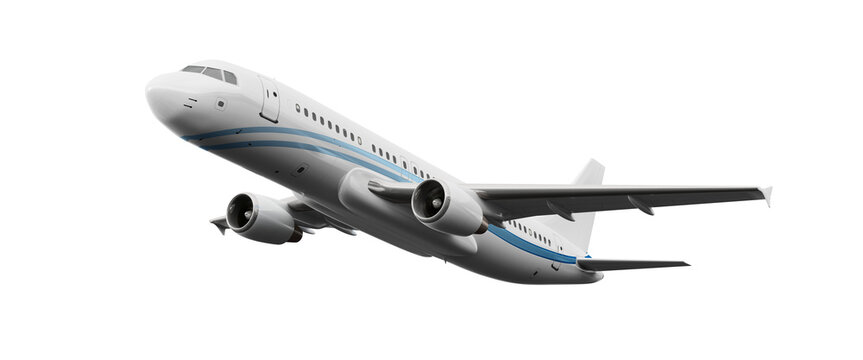

1/1 [==============================] - 0s 389ms/step
The image represents airplane


In [30]:
input_image_path = input('path of the image to be pridicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)
#Considering image is greater then 224,224 pixels
input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3]) # telling the model we are making prediction for only 1 image

input_prediction = model.predict(image_reshaped) # This prediction will provide us wheter it is dog or cat. Result will be like [0.85, 0.15]
#print(input_prediction)
input_pred_label = np.argmax(input_prediction) # This will select the class having high prediction value
#print(input_pred_label)

if input_pred_label == 0:
   print('The image represents airplane')

elif input_pred_label == 1:
    print('The image represents automobile')

elif input_pred_label == 2:
    print('The image represents bird')

elif input_pred_label == 3:
    print('The image represents cat')

elif input_pred_label == 4:
    print('The image represents deer')

elif input_pred_label == 5:
    print('The image represents dog')

elif input_pred_label == 6:
    print('The image represents frog')

elif input_pred_label == 7:
    print('The image represents horse')

elif input_pred_label == 8:
    print('The image represents ship')

else:
    print('The image represents truck')